In [1]:
import os
os.getcwd()

'/content'

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
FullRaw = pd.read_csv("/content/gdrive/MyDrive/IMR_Data/cancerdata.csv")
FullRaw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


In [5]:
FullRaw.shape

(569, 32)

**Missing Value Check**

In [6]:
FullRaw.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
###################
# Recode Categorical variables to Numeric (dummy variable creation)
###################

import numpy as np

FullRaw.dtypes # There is only ONE categ. var, i.e. diagnosis
FullRaw['diagnosis'] = np.where(FullRaw['diagnosis'] == 'M', 1, 0)


In [8]:
###################
# Drop id column
###################

FullRaw.drop(['id'], axis = 1, inplace = True)

In [9]:
###################
# Standardization
###################

from sklearn.preprocessing import StandardScaler

FullRaw_Scaling = StandardScaler().fit(FullRaw)
FullRaw_Std = FullRaw_Scaling.transform(FullRaw)
FullRaw_Std = pd.DataFrame(FullRaw_Std, columns = FullRaw.columns)

In [10]:
FullRaw_Std.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,0.013881,0.260882,1.269934,0.984375,0.016434,-0.327064,1.119732,1.134648,-1.120050,...,1.886690,-1.359293,2.303601,2.001237,1.307686,-0.701018,2.109526,-0.024805,2.750622,1.025937
1,1.297676,1.260512,0.762178,1.685955,1.908708,-0.104871,-0.833161,-0.066185,-0.652919,1.265773,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,1.828835,-0.146749,-1.340454,-0.243890,-0.171962
2,1.297676,0.396013,-0.167180,1.566503,1.558884,-1.456150,-0.909003,0.489096,0.087740,1.594474,...,1.511870,-0.023974,1.347475,1.456285,0.527407,-0.493896,0.854974,0.422629,1.152255,0.335611
3,1.297676,0.403088,1.891747,-0.592687,-0.764464,-0.316835,-0.355227,1.237301,-0.895001,-0.011010,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,-0.121482,1.989588,-0.177328,6.046041,0.195711
4,1.297676,-0.044249,-1.628685,1.776573,1.826229,-0.224964,-1.851124,-0.749924,-0.256612,-1.214339,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-1.077736,0.613179,0.063246,-0.868353,0.264407


In [11]:
###################
# Number of clusters
###################

# Elbow method
from sklearn.cluster import KMeans

WSS = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, random_state = 123).fit(FullRaw_Std)
    WSS.append(kmeans.inertia_) # .inertia_ has the overall WSS


In [12]:
WSS

[17639.0,
 14516.346175863122,
 13786.282027104788,
 13428.878103951669,
 13088.637411202684,
 12822.029143374273,
 12565.380415735392,
 12371.579884075483,
 12226.809596913972,
 12097.294762593207,
 11891.611373973867,
 11749.041862465134,
 11627.71182016132,
 11491.931212704227]

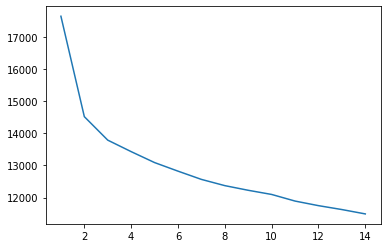

In [13]:
# Plot
import seaborn as sns
sns.lineplot(x=range(1,15), y = WSS)

In [14]:
###################
# Modeling
###################

# Clustering with 3 clusters
Kmeans_Model = KMeans(n_clusters = 3, random_state = 123).fit(FullRaw_Std)

In [15]:
###################
# Clustering Output Binding
###################

# Cluster labeling for each point
Kmeans_Model.labels_


array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1,
       2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2, 0,
       0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2,
       0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

In [20]:
# Combine cluster info with original data
FullRaw2 = pd.concat([FullRaw, pd.Series(Kmeans_Model.labels_)], axis = 1).rename(columns = {0:'Cluster'})
FullRaw2.head()




,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster
0,1,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,...,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594,1
1,1,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,...,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397,1
2,1,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,...,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802,1
3,1,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,...,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210,0
4,1,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,...,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483,1


In [21]:
# Cluster sizes
FullRaw2['Cluster'].value_counts()

2    352
0    120
1     97
Name: Cluster, dtype: int64

In [22]:
# Cluster centers (Cluster Profiling)
Cluster_Profile_Df = FullRaw2.groupby(['Cluster']).mean()
Cluster_Profile_Df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.925000,14.269312,18.812039,98.672583,707.808333,0.096275,0.100798,0.091479,0.043931,0.181446,...,17.768667,29.281917,118.691333,983.040833,0.148220,0.226198,0.462641,0.118526,0.335319,0.081634
1,1.000000,13.792530,19.253326,133.877320,1281.506186,0.094194,0.112552,0.102599,0.047281,0.178985,...,24.830103,29.072474,166.642268,1914.268041,0.140245,0.253572,0.469829,0.114722,0.312033,0.081737
2,0.011364,14.219266,19.035811,78.135142,464.172727,0.096221,0.106610,0.089884,0.050644,0.179753,...,13.398889,23.512727,87.001051,560.803693,0.124794,0.247348,0.152798,0.125656,0.268601,0.083141


In [ ]:
###################
# Bi-variate Plots
###################

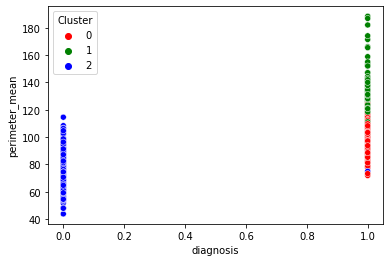

In [25]:
# Diagnosis vs. Perimeter_mean
sns.scatterplot(x = 'diagnosis', y = 'perimeter_mean',  data = FullRaw2, hue = "Cluster", palette = ["red", "green", "blue"])

# Evident that people from cluster "1" who have cancer (1s) happen to have a relatively higher parameter_mean

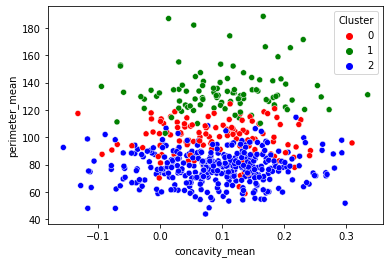

In [26]:
# Some plots may not reveal too much insights: Concavity_mean vs. Perimeter_mean
sns.scatterplot(x = 'concavity_mean', y = 'perimeter_mean', hue = 'Cluster', data = FullRaw2, palette = ["red", "green", "blue"])

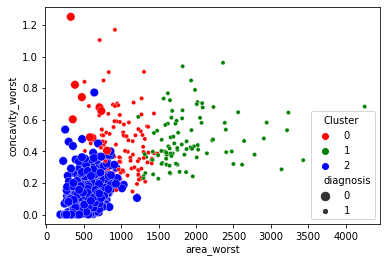

In [ ]:
# 3-Variable plot: Area_Worst vs. Concavity_Worst vs. diagnosis
sns.scatterplot(x = 'area_worst', y = 'concavity_worst', hue = 'Cluster', size = 'diagnosis', data = FullRaw2, palette = ["red", "green", "blue"])

# Cluster "B" (Orange) patients are mostly diagnosed with cancer (1s)
# Cluster "A" (Blue) patients seem to have higher area_worst and concavity_worst

In [27]:
###################
# Clustering Validation using Silhouette Value
###################


from sklearn.metrics import silhouette_samples, silhouette_score


FullRaw_Std2 = pd.concat([FullRaw_Std, pd.Series(Kmeans_Model.labels_)], 
                          axis = 1).rename(columns = {0:'Cluster'}).copy()
FullRaw_Std2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster
0,1.297676,0.013881,0.260882,1.269934,0.984375,0.016434,-0.327064,1.119732,1.134648,-1.120050,...,-1.359293,2.303601,2.001237,1.307686,-0.701018,2.109526,-0.024805,2.750622,1.025937,1
1,1.297676,1.260512,0.762178,1.685955,1.908708,-0.104871,-0.833161,-0.066185,-0.652919,1.265773,...,-0.369203,1.535126,1.890489,-0.375612,1.828835,-0.146749,-1.340454,-0.243890,-0.171962,1
2,1.297676,0.396013,-0.167180,1.566503,1.558884,-1.456150,-0.909003,0.489096,0.087740,1.594474,...,-0.023974,1.347475,1.456285,0.527407,-0.493896,0.854974,0.422629,1.152255,0.335611,1
3,1.297676,0.403088,1.891747,-0.592687,-0.764464,-0.316835,-0.355227,1.237301,-0.895001,-0.011010,...,0.133984,-0.249939,-0.550021,3.394275,-0.121482,1.989588,-0.177328,6.046041,0.195711,0
4,1.297676,-0.044249,-1.628685,1.776573,1.826229,-0.224964,-1.851124,-0.749924,-0.256612,-1.214339,...,-1.466770,1.338539,1.220724,0.220556,-1.077736,0.613179,0.063246,-0.868353,0.264407,1


In [28]:
# Individual Row Silhouette Scores
FullRaw_Std2['Silhouette_Value'] = silhouette_samples(FullRaw_Std, Kmeans_Model.labels_)
FullRaw_Std2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster,Silhouette_Value
0,1.297676,0.013881,0.260882,1.269934,0.984375,0.016434,-0.327064,1.119732,1.134648,-1.120050,...,2.303601,2.001237,1.307686,-0.701018,2.109526,-0.024805,2.750622,1.025937,1,0.110997
1,1.297676,1.260512,0.762178,1.685955,1.908708,-0.104871,-0.833161,-0.066185,-0.652919,1.265773,...,1.535126,1.890489,-0.375612,1.828835,-0.146749,-1.340454,-0.243890,-0.171962,1,0.111789
2,1.297676,0.396013,-0.167180,1.566503,1.558884,-1.456150,-0.909003,0.489096,0.087740,1.594474,...,1.347475,1.456285,0.527407,-0.493896,0.854974,0.422629,1.152255,0.335611,1,0.078351
3,1.297676,0.403088,1.891747,-0.592687,-0.764464,-0.316835,-0.355227,1.237301,-0.895001,-0.011010,...,-0.249939,-0.550021,3.394275,-0.121482,1.989588,-0.177328,6.046041,0.195711,0,0.115630
4,1.297676,-0.044249,-1.628685,1.776573,1.826229,-0.224964,-1.851124,-0.749924,-0.256612,-1.214339,...,1.338539,1.220724,0.220556,-1.077736,0.613179,0.063246,-0.868353,0.264407,1,0.073577


In [29]:
# Cluster-wise Silhouette Scores
FullRaw_Std2.groupby(['Cluster'])['Silhouette_Value'].mean()

Cluster
0    0.057846
1    0.098351
2    0.153818
Name: Silhouette_Value, dtype: float64

In [30]:
# Overall Sihouette Score
silhouette_score(FullRaw_Std, Kmeans_Model.labels_) 


0.12412195184140173

In [31]:
############################
# Overall Vizualization of K-means clustering (PCA Application)
############################

from sklearn.decomposition import PCA
Kmeans_Standardized_Data = FullRaw_Std2.copy()

# Drop Cluster columns
Kmeans_Standardized_Data2 = Kmeans_Standardized_Data.drop(['Cluster', 'Silhouette_Value'], 
                                                          axis = 1).copy()

In [32]:
Kmeans_Standardized_Data2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,0.013881,0.260882,1.269934,0.984375,0.016434,-0.327064,1.119732,1.134648,-1.120050,...,1.886690,-1.359293,2.303601,2.001237,1.307686,-0.701018,2.109526,-0.024805,2.750622,1.025937
1,1.297676,1.260512,0.762178,1.685955,1.908708,-0.104871,-0.833161,-0.066185,-0.652919,1.265773,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,1.828835,-0.146749,-1.340454,-0.243890,-0.171962
2,1.297676,0.396013,-0.167180,1.566503,1.558884,-1.456150,-0.909003,0.489096,0.087740,1.594474,...,1.511870,-0.023974,1.347475,1.456285,0.527407,-0.493896,0.854974,0.422629,1.152255,0.335611
3,1.297676,0.403088,1.891747,-0.592687,-0.764464,-0.316835,-0.355227,1.237301,-0.895001,-0.011010,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,-0.121482,1.989588,-0.177328,6.046041,0.195711
4,1.297676,-0.044249,-1.628685,1.776573,1.826229,-0.224964,-1.851124,-0.749924,-0.256612,-1.214339,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-1.077736,0.613179,0.063246,-0.868353,0.264407


In [33]:
# Create PCA model
PCA_Model = PCA(n_components = 2).fit(Kmeans_Standardized_Data2)

# PCA model variation
PCA_Model.explained_variance_ratio_ # % variation explained

array([0.23411876, 0.06536033])

In [34]:
# Transform standardized data using PCA model to Transformed Variables
Kmeans_Transformed_Data = pd.DataFrame(PCA_Model.transform(Kmeans_Standardized_Data2))
Kmeans_Transformed_Data.columns = ['PC1', 'PC2'] # Rename columns for ease of plotting
Kmeans_Transformed_Data.head()

,PC1,PC2
0,5.219789,1.227691
1,3.613548,-1.993147
2,4.068786,-0.126067
3,1.732691,5.812154
4,3.586107,-1.175052


In [35]:
Kmeans_Transformed_Data.shape

(569, 2)

In [36]:
# Combine cluster information for plotting on PC axes
Kmeans_Transformed_Data_With_Clusters = pd.concat([Kmeans_Transformed_Data, 
                                                   Kmeans_Standardized_Data['Cluster']], 
                                                  axis = 1) # Combine cluster information
Kmeans_Transformed_Data_With_Clusters.head()

,PC1,PC2,Cluster
0,5.219789,1.227691,1
1,3.613548,-1.993147,1
2,4.068786,-0.126067,1
3,1.732691,5.812154,0
4,3.586107,-1.175052,1


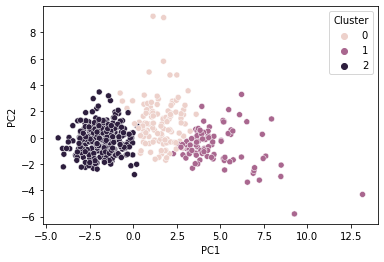

In [37]:
# Plot the transformed data
# import seaborn as sns
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster', 
                data = Kmeans_Transformed_Data_With_Clusters)

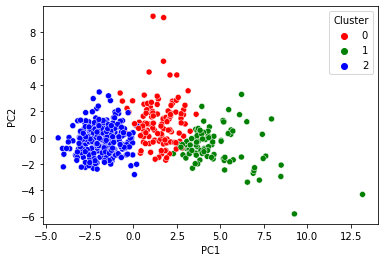

In [38]:
# Plot with some other cluster colors
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster', 
                data = Kmeans_Transformed_Data_With_Clusters, 
                palette=['red', 'green', 'blue'])